In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from PIL import Image
from skimage import transform
import matplotlib.pyplot as plt

In [31]:
h = 150
w = 150
d = 3
breed_ids = [82,123,51,21,37,62,209,27,69]
breed_names = ['Cryptelytrops erythrurus',
              'Pseudechis australis',
              'Pseudocerastes persicus ',
              'Dendroaspis viridis',
              'Naja annulifera',
              'Acanthophis rugosus',
              'Crotalus tzabcan',
              'Echis khosatzkii ',
              'Bungarus fasciatus']

def load_images(path='./data/validation'):
    X = []
    y = []
    # we load every alphabet seperately so we can isolate them later
    for breed_id in breed_ids:
        print("loading snake breed: " + str(breed_id))
        # lang_dict[alphabet] = [curr_y,None]
        # alphabet_path = os.path.join(path,alphabet)
        # every letter/category has it's own column in the array, so  load seperately
        breed_path = os.path.join(path, str(breed_id))
        breed_images = []
        for filename in os.listdir(breed_path):
            image_path = os.path.join(breed_path, filename)
            # image = imread(image_patah)
            image = Image.open(image_path)
            if image.mode != 'RGB':
                image = image.convert('RGB')
            image = np.asarray(image)
            image = transform.resize(image, (w, h))
            breed_images.append(image)
        breed_images = np.asarray(breed_images)
        X.append(breed_images)
        y.append(int(breed_id))
#     X = [x for _, x in sorted(zip(y, X))]
#     y = [y for y, _ in sorted(zip(y, X))]
#     y = np.vstack(y)
#     X = np.asarray(X)
    return X, y


In [54]:
def draw_reference_images_for_paper(images):
    fig, axarr = plt.subplots(nrows=3, ncols=3, figsize=(20,21))
    
#     fig.set_size_inches(100, 10.5)
    fig.tight_layout() 
#     frame1.axes.get_xaxis().set_ticks([])
#     frame1.axes.get_yaxis().set_ticks([])

    for row in range(3):
        for col in range(3):
            img = images[row*3+col][0]
            print(row,col)
            axarr[row][col].imshow(img)
            axarr[row][col].axis('off')
            axarr[row][col].set_title('{}'.format(breed_names[row*3+col]),fontsize=30)
    fig.savefig('image_for_paper1.png')
    plt.show()

loading snake breed: 82
loading snake breed: 123
loading snake breed: 51
loading snake breed: 21
loading snake breed: 37
loading snake breed: 62
loading snake breed: 209
loading snake breed: 27
loading snake breed: 69


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


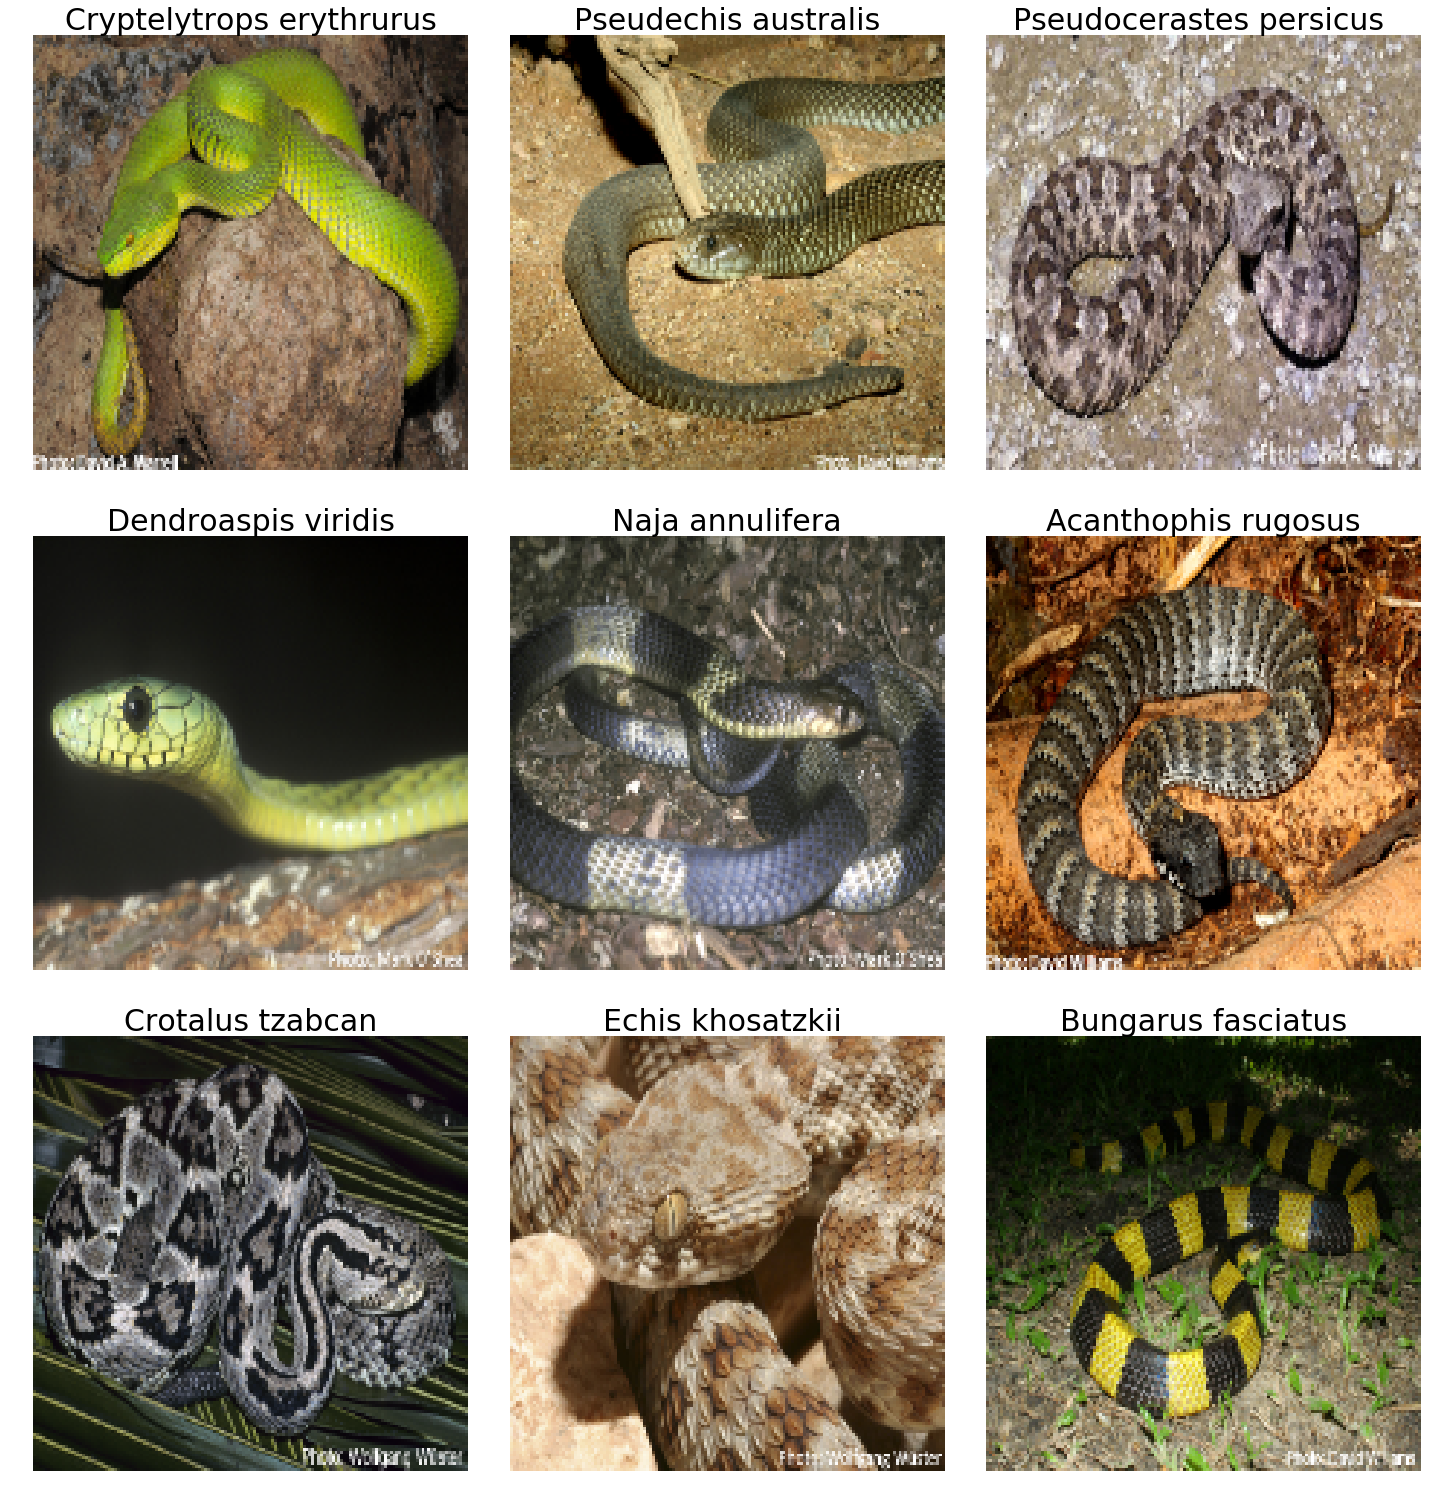

In [55]:
X, y = load_images()
# print(X[0].shape)
draw_reference_images_for_paper(X)